# CHICKEN PRICES IN INDIA

Epp Haavasalu, Grete Hollo

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
prices_df = pd.read_csv('chicken_prices_india.csv', sep=',')
prices = prices_df.values

In [3]:
df = pd.DataFrame(prices_df)

df["District"] = df["District"].str.split("(", expand=True )


In [4]:
df.describe()

,Year,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
count,4771.000000,3559.000000,3580.000000,3580.000000,3578.000000,3579.000000,3604.000000,3589.000000,3590.000000,3588.000000,...,3513.000000,3537.000000,3537.000000,3532.000000,3520.000000,3539.000000,3522.000000,3301.000000,3165.000000,2015.000000
mean,2019.926431,88.623209,88.732123,88.831285,123.494410,90.090807,123.836016,90.563667,90.244568,89.335006,...,89.524338,89.685609,89.223636,91.893545,88.321875,88.534614,88.580068,89.220539,89.679621,87.965757
std,0.805794,38.023238,30.768885,20.775642,2025.415909,27.522223,2032.965292,38.795862,35.361995,27.627674,...,20.514414,34.903335,20.118203,153.689267,19.672585,25.671042,25.509363,33.335619,25.903528,22.155143
min,2018.000000,16.000000,30.000000,36.000000,11.000000,8.000000,25.000000,4.000000,24.000000,18.000000,...,15.000000,15.000000,20.000000,20.000000,20.000000,8.000000,20.000000,15.000000,11.000000,15.000000
25%,2019.000000,73.000000,74.000000,75.000000,76.000000,77.000000,77.000000,77.000000,76.000000,74.000000,...,75.000000,75.000000,75.000000,76.000000,75.000000,75.000000,75.000000,75.000000,75.000000,74.000000
50%,2020.000000,87.000000,87.000000,88.000000,88.000000,88.000000,88.000000,88.000000,89.000000,88.000000,...,90.000000,90.000000,90.000000,90.000000,89.000000,88.000000,88.000000,88.000000,90.000000,88.000000
75%,2021.000000,100.000000,100.000000,100.250000,101.000000,102.000000,102.000000,103.000000,103.000000,102.000000,...,103.000000,102.000000,101.000000,100.000000,100.000000,100.000000,100.000000,100.000000,102.000000,100.000000
max,2021.000000,1213.000000,1069.000000,400.000000,121232.000000,1154.000000,122124.000000,1127.000000,1087.000000,1111.000000,...,145.000000,1087.000000,155.000000,9090.000000,177.000000,1078.000000,1077.000000,1219.000000,1001.000000,160.000000


In [5]:
df["Year"].value_counts()

2020    1702
2019    1683
2021    1368
2018      18
Name: Year, dtype: int64

In [6]:
df["Month"].value_counts()

February     446
July         444
January      439
March        438
May          428
April        428
June         421
August       421
September    412
November     303
October      297
December     294
Name: Month, dtype: int64

In [53]:
pd.set_option('display.max_rows', None)
df["District"].value_counts()

Safidon              99
Sangrur              83
Gurdaspur            82
Patiala              82
Ludhiana             82
Hoshiarpur           82
Pathankot            82
Nawanshahr           81
Bhopal               66
Jabalpur             66
Indore               66
Allahabad            60
Jagdishpur           60
Varanasi             60
Samrala              49
Barnala              49
Dasuya               49
Batala               49
Mansa                49
Moga                 49
Bahraich             42
Arrah                34
Patna                34
Darbhanga            34
Chittur              34
Hajipur              34
Samastipur           34
Mangaldai            34
Sarthebari           34
Mirza                34
Kaliabor             34
Golaghat             34
Muzaffarpur          34
Biswantahchariali    34
Abhayapuri           34
Raha                 34
Jagiroad             34
Bokajan              34
Pathsala             34
Sasaram              34
Anand                33
Madurai         

Text(0.5, 0, 'Month')

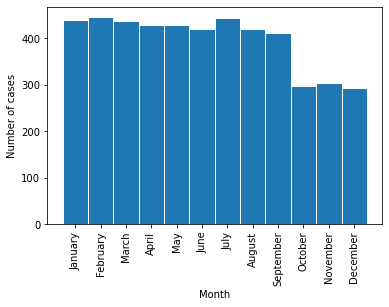

In [8]:

sort_order = ["January", "February", "March", "April", "May", "June", "July", "August",  "September", "October", "November", "December"]
df.index = pd.CategoricalIndex(df["Month"], categories=sort_order, ordered=True)
df = df.sort_index()

plt.hist(df["Month"], bins= [0,1,2,3,4,5,6,7,8,9,10,11,12],edgecolor='white', align='left')
plt.xticks(rotation='vertical')
plt.ylabel('Number of cases')
plt.xlabel('Month')

Text(0.5, 0, 'Town')

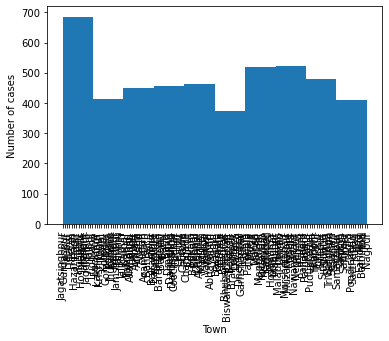

In [9]:
plt.hist(df["District"])
plt.xticks(rotation='vertical')
plt.ylabel('Number of cases')
plt.xlabel('Town')

In [10]:
df.head()

,Year,Month,District,1,2,3,4,5,6,7,...,22,23,24,25,26,27,28,29,30,31
Month,,,,,,,,,,,,,,,,,,,,,
January,2020,January,Jagatsinghpur,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
January,2020,January,Gurdaspur,80.0,80.0,80.0,80.0,82.0,84.0,87.0,...,77.0,78.0,78.0,79.0,80.0,80.0,81.0,80.0,72.0,72.0
January,2020,January,Gurdaspur,80.0,80.0,80.0,80.0,82.0,82.0,87.0,...,77.0,76.0,78.0,79.0,80.0,79.0,81.0,78.0,72.0,72.0
January,2020,January,Hajipur,88.0,88.0,87.0,87.0,87.0,86.0,86.0,...,93.0,93.0,93.0,93.0,93.0,93.0,86.0,88.0,90.0,92.0
January,2020,January,Hansi,78.0,76.0,76.0,76.0,78.0,80.0,82.0,...,82.0,82.0,82.0,82.0,82.0,82.0,82.0,82.0,82.0,82.0


In [48]:
import math

for i in range(5):
    rowNaN = 0
    for j in range(3, 34):
        if math.isnan(df.iloc[i][j]) == True:
            print(str(i) + " tühi")
            rowNaN += 1
        print(df.iloc[i][j])
    print(rowNaN)

0 tühi
nan
0 tühi
nan
0 tühi
nan
0 tühi
nan
0 tühi
nan
0 tühi
nan
0 tühi
nan
0 tühi
nan
0 tühi
nan
0 tühi
nan
0 tühi
nan
0 tühi
nan
0 tühi
nan
0 tühi
nan
0 tühi
nan
0 tühi
nan
0 tühi
nan
0 tühi
nan
0 tühi
nan
0 tühi
nan
0 tühi
nan
0 tühi
nan
0 tühi
nan
0 tühi
nan
0 tühi
nan
0 tühi
nan
0 tühi
nan
0 tühi
nan
0 tühi
nan
0 tühi
nan
0 tühi
nan
31
80.0
80.0
80.0
80.0
82.0
84.0
87.0
91.0
91.0
87.0
82.0
82.0
82.0
86.0
84.0
76.0
80.0
82.0
82.0
82.0
79.0
77.0
78.0
78.0
79.0
80.0
80.0
81.0
80.0
72.0
72.0
0
80.0
80.0
80.0
80.0
82.0
82.0
87.0
91.0
91.0
87.0
82.0
80.0
81.0
86.0
84.0
74.0
76.0
80.0
80.0
80.0
79.0
77.0
76.0
78.0
79.0
80.0
79.0
81.0
78.0
72.0
72.0
0
88.0
88.0
87.0
87.0
87.0
86.0
86.0
87.0
87.0
85.0
85.0
90.0
88.0
95.0
95.0
95.0
95.0
92.0
92.0
92.0
93.0
93.0
93.0
93.0
93.0
93.0
93.0
86.0
88.0
90.0
92.0
0
78.0
76.0
76.0
76.0
78.0
80.0
82.0
86.0
90.0
90.0
86.0
82.0
80.0
82.0
84.0
80.0
80.0
82.0
84.0
82.0
82.0
82.0
82.0
82.0
82.0
82.0
82.0
82.0
82.0
82.0
82.0
0


In [40]:
for i in range(31):
    print(df.loc[df[str(i+1)].isnull() == True])

          Year     Month       District   1   2   3   4   5   6   7  ...  22  \
Month                                                                ...       
January   2020   January  Jagatsinghpur NaN NaN NaN NaN NaN NaN NaN  ... NaN   
January   2020   January        Jaunpur NaN NaN NaN NaN NaN NaN NaN  ... NaN   
January   2020   January          Jammu NaN NaN NaN NaN NaN NaN NaN  ... NaN   
January   2020   January       Faizabad NaN NaN NaN NaN NaN NaN NaN  ... NaN   
January   2020   January         Amethi NaN NaN NaN NaN NaN NaN NaN  ... NaN   
...        ...       ...            ...  ..  ..  ..  ..  ..  ..  ..  ...  ..   
December  2019  December           Agra NaN NaN NaN NaN NaN NaN NaN  ... NaN   
December  2019  December      Brahampur NaN NaN NaN NaN NaN NaN NaN  ... NaN   
December  2019  December         Amethi NaN NaN NaN NaN NaN NaN NaN  ... NaN   
December  2019  December       Akbarpur NaN NaN NaN NaN NaN NaN NaN  ... NaN   
December  2019  December        Cuttack 

          Year     Month       District     1     2     3     4     5     6  \
Month                                                                         
January   2020   January  Jagatsinghpur   NaN   NaN   NaN   NaN   NaN   NaN   
January   2020   January     Jagdishpur  82.0  82.0  78.0  80.0  82.0  84.0   
January   2020   January        Lucknow  86.0  86.0  80.0  82.0  84.0  86.0   
January   2020   January      Lakhimpur  82.0  82.0  78.0  82.0  84.0  86.0   
January   2020   January      Gorakhpur  86.0  86.0  82.0  84.0  86.0  88.0   
...        ...       ...            ...   ...   ...   ...   ...   ...   ...   
December  2019  December           Agra   NaN   NaN   NaN   NaN   NaN   NaN   
December  2019  December      Brahampur   NaN   NaN   NaN   NaN   NaN   NaN   
December  2019  December         Amethi   NaN   NaN   NaN   NaN   NaN   NaN   
December  2019  December       Akbarpur   NaN   NaN   NaN   NaN   NaN   NaN   
December  2019  December        Cuttack   NaN   NaN 

          Year     Month       District   1   2   3   4   5   6   7  ...  22  \
Month                                                                ...       
January   2020   January  Jagatsinghpur NaN NaN NaN NaN NaN NaN NaN  ... NaN   
January   2020   January        Jaunpur NaN NaN NaN NaN NaN NaN NaN  ... NaN   
January   2020   January          Jammu NaN NaN NaN NaN NaN NaN NaN  ... NaN   
January   2020   January       Faizabad NaN NaN NaN NaN NaN NaN NaN  ... NaN   
January   2020   January         Amethi NaN NaN NaN NaN NaN NaN NaN  ... NaN   
...        ...       ...            ...  ..  ..  ..  ..  ..  ..  ..  ...  ..   
December  2019  December           Agra NaN NaN NaN NaN NaN NaN NaN  ... NaN   
December  2019  December      Brahampur NaN NaN NaN NaN NaN NaN NaN  ... NaN   
December  2019  December         Amethi NaN NaN NaN NaN NaN NaN NaN  ... NaN   
December  2019  December       Akbarpur NaN NaN NaN NaN NaN NaN NaN  ... NaN   
December  2019  December        Cuttack 

          Year     Month       District   1   2   3   4   5   6   7  ...  22  \
Month                                                                ...       
January   2020   January  Jagatsinghpur NaN NaN NaN NaN NaN NaN NaN  ... NaN   
January   2020   January        Jaunpur NaN NaN NaN NaN NaN NaN NaN  ... NaN   
January   2020   January          Jammu NaN NaN NaN NaN NaN NaN NaN  ... NaN   
January   2020   January       Faizabad NaN NaN NaN NaN NaN NaN NaN  ... NaN   
January   2020   January         Amethi NaN NaN NaN NaN NaN NaN NaN  ... NaN   
...        ...       ...            ...  ..  ..  ..  ..  ..  ..  ..  ...  ..   
December  2019  December           Agra NaN NaN NaN NaN NaN NaN NaN  ... NaN   
December  2019  December      Brahampur NaN NaN NaN NaN NaN NaN NaN  ... NaN   
December  2019  December         Amethi NaN NaN NaN NaN NaN NaN NaN  ... NaN   
December  2019  December       Akbarpur NaN NaN NaN NaN NaN NaN NaN  ... NaN   
December  2019  December        Cuttack 

In [ ]:
df.fillna(df.mean(axis=1)) 
